In [1]:
%run InitAndFuctions.ipynb

Host: 3c9f9b817173
3.6.8 (default, Nov 16 2020, 16:55:22) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-44)] <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7fcafc62b588>
Welcome to JupyROOT 6.24/08


In [83]:
#
# carica i dati dal file
#
# bandella
file_out=mybasepath+"out/dbscan_run4184_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz"
file_out=mybasepath+"out/dbscan_run4184_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183.plk.gz"
# KFC
file_out=mybasepath+"out/dbscan_run4039_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz"
#file_out=mybasepath+"out/dbscan_run4046_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz"
#file_out=mybasepath+"out/dbscan_run4160_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183.plk.gz"
file_out=mybasepath+"out/dbscan_run4045_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz"
file_out="./dbscan_run10919_cmin_0_cmax_500_rescale_576_nsigma_1.5_ped_10918.plk.gz"
df = pd.read_pickle(file_out, compression='gzip')

# range
# charge distribution
# charge asimettriy

df['length'] = np.sqrt((df['x0end'] - df['x0start'])**2 + (df['y0end'] - df['y0start'])**2)
df['x0c'] = (df['x0end'] + df['x0start'])/2.
df['y0c'] = (df['y0end'] + df['y0start'])/2.
df = df[(df['cluster_lable'] > -1) & (df['width'] > 0) & (df['height'] > 0) & (df['photons'] > 0)]

In [73]:
df

,iTr,cluster_lable,pixels,photons,ph_pixels,x0start,y0start,x0end,y0end,width,height,pearson,length,x0c,y0c
1,0.0,1.0,395.0,2123.578512,5.376148,1260.0,720.0,1272.0,740.0,28.612469,24.157300,0.737154,23.323808,1266.0,730.0
2,0.0,2.0,289.0,2518.743802,8.715376,2164.0,820.0,2172.0,828.0,24.787093,19.595918,0.000000,11.313708,2168.0,824.0
3,0.0,3.0,19781.0,88751.471074,4.486703,872.0,912.0,872.0,1008.0,354.175920,119.481477,0.011959,96.000000,872.0,960.0
4,0.0,4.0,684.0,4136.338843,6.047279,700.0,920.0,724.0,932.0,64.328160,18.500386,0.257239,26.832816,712.0,926.0
5,0.0,5.0,537.0,3740.090909,6.964788,1392.0,988.0,1400.0,1008.0,25.264572,35.296291,-0.021368,21.540659,1396.0,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,117.0,11.0,203.0,1149.347107,5.661808,1424.0,1588.0,1436.0,1592.0,34.438261,10.411592,0.372678,12.649111,1430.0,1590.0
3669,117.0,12.0,181.0,879.619835,4.859778,488.0,1688.0,492.0,1692.0,19.725317,15.994075,-0.480384,5.656854,490.0,1690.0
3670,117.0,13.0,824.0,4661.347107,5.656975,1500.0,1764.0,1504.0,1792.0,38.033532,39.318359,0.130564,28.284271,1502.0,1778.0
3671,117.0,14.0,583.0,9760.289256,16.741491,1428.0,2036.0,1436.0,2052.0,29.599431,33.491554,-0.122914,17.888544,1432.0,2044.0


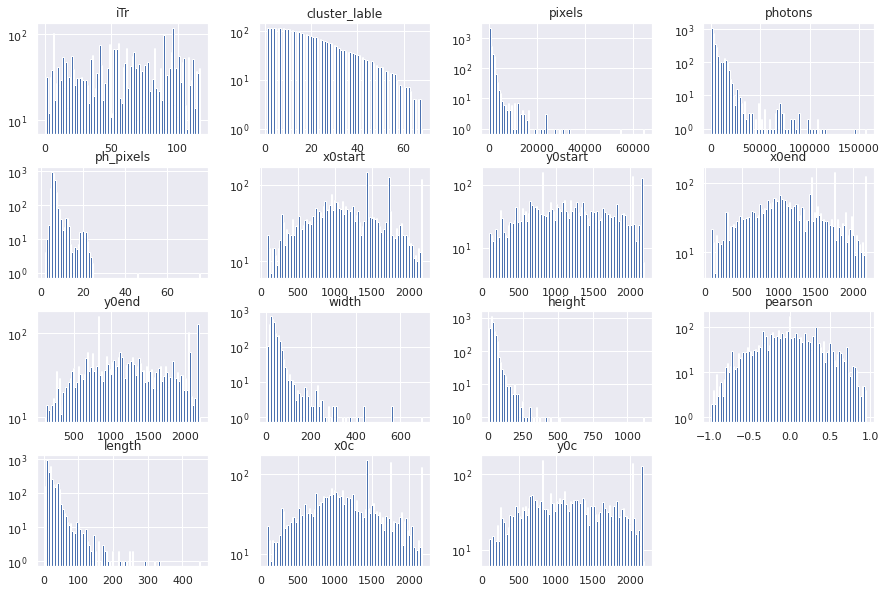

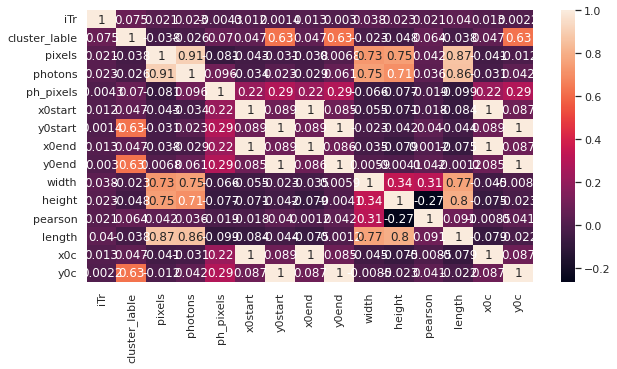

In [74]:
import seaborn as sns
sns.set()
#
# Visulizza tutte le Varibili
#
df.hist(bins=100, figsize=(15,10), log=True)
plt.show()

plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

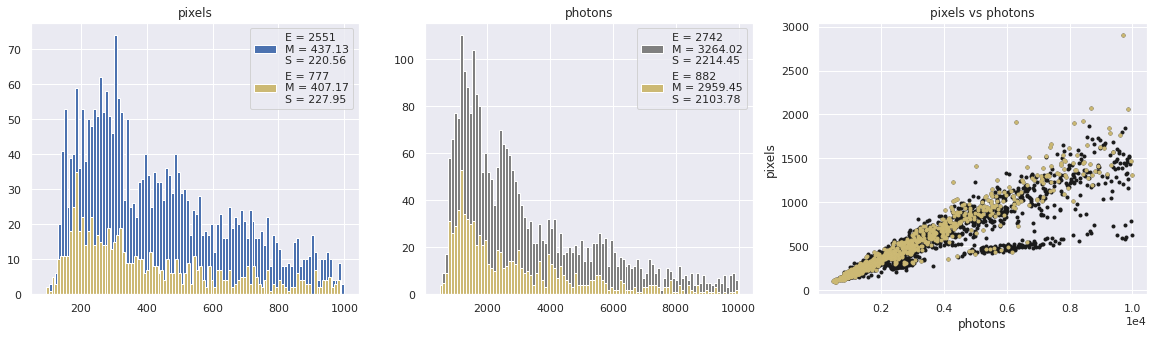

In [77]:
# cuts
phmax  = 10000
pmax   = 1000
pFeMax = 0.4
bins   = 100

fig, ax = plt.subplots(1,3, figsize=(20,5))
pd_his_plot(df.pixels[(df.pixels<pmax)], ax=ax[0], bins=bins)
pd_his_plot(df.pixels[(df.pixels<pmax) & (abs(df.pearson)>pFeMax)], ax=ax[0], bins=bins, color="y")

pd_his_plot(df.photons[df.photons<phmax], ax=ax[1], bins=bins, color="gray")
pd_his_plot(df.photons[(df.photons<phmax) & (abs(df.pearson)>pFeMax)], ax=ax[1], bins=bins, color="y")

ax[2].set_title('pixels vs photons')
ax[2].plot(df.photons[df.photons<phmax].values, df.pixels[df.photons<phmax].values, 'k.')
ax[2].plot(df.photons[(df.photons<phmax) & (abs(df.pearson)>pFeMax)].values, 
           df.pixels[(df.photons<phmax) & (abs(df.pearson)>pFeMax)].values, 'y.')

ax[2].set_xlabel('photons')
ax[2].set_ylabel('pixels')
ax[2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax[0].set_yscale('log')
#ax[1].set_yscale('log')
plt.show()

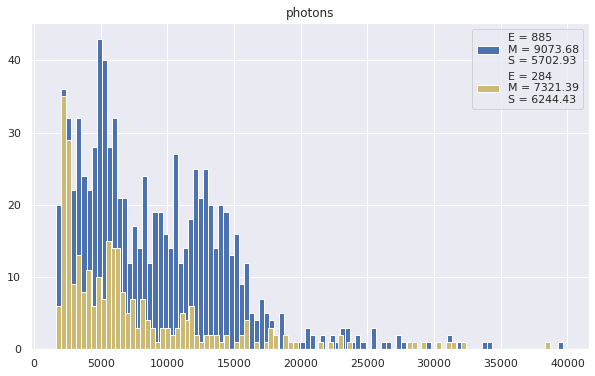

In [65]:
#
# Visualizziamo i fotoni
#
fig, ax = plt.subplots(figsize=(10,6))
pd_his_plot(df.photons[(df.photons<=phmax) & (abs(df.pearson)<pFeMax)], ax=ax, bins=bins)
pd_his_plot(df.photons[(df.photons<=phmax) & (abs(df.pearson)>pFeMax)], ax=ax, bins=bins, color="y")

#ax.hist(df.photons[abs(df.pearson)<0.4], bins, range=(0,phmax))
#ax.hist(df.photons[abs(df.pearson)>0.4], bins, range=(0,phmax), color='y')
#ax.set_yscale('log')
plt.show()

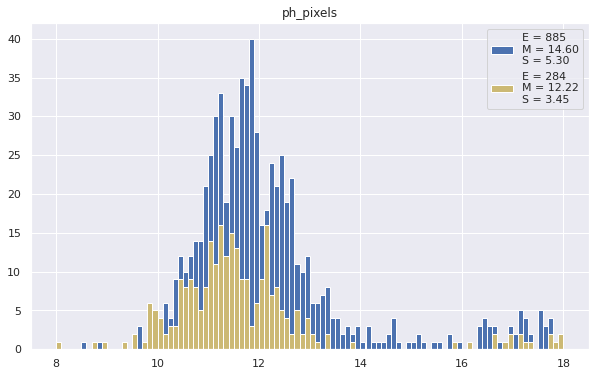

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
pd_his_plot(df.ph_pixels[(df.photons<=phmax) & (abs(df.pearson)<pFeMax)], ax=ax, bins=bins, range=(8,18))
pd_his_plot(df.ph_pixels[(df.photons<=phmax) & (abs(df.pearson)>pFeMax)], ax=ax, bins=bins, color="y", range=(8,18))

#ax.set_yscale('log')
plt.show()

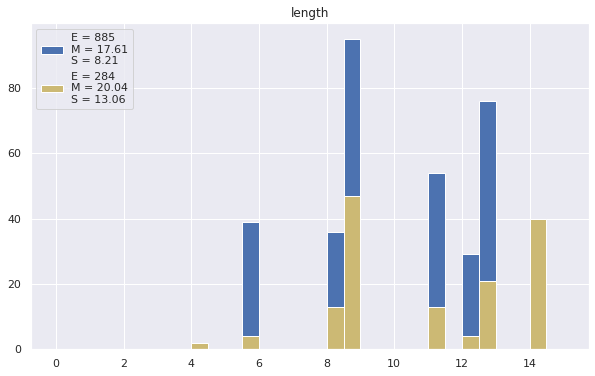

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
pd_his_plot(df.length[(df.photons<=phmax) & (abs(df.pearson)<pFeMax)], ax=ax, bins=30, range=(0,15))
pd_his_plot(df.length[(df.photons<=phmax) & (abs(df.pearson)>pFeMax)], ax=ax, bins=30, color="y", range=(0,15))

#ax.set_yscale('log')
plt.show()

Fidical Ellips: 60.00, 60.00 [mm]
Centro: 57.60 [mm]


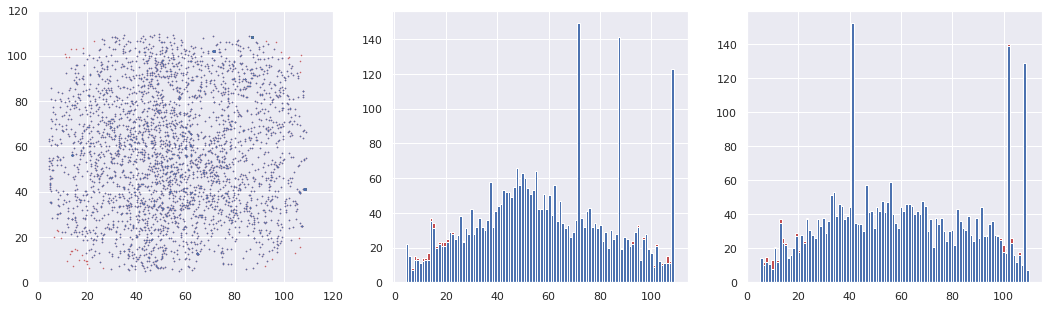

In [84]:
pd.set_option('mode.chained_assignment', None)

# Normalization

GIN = True

if GIN:
    # LEMON
    pixelscale  = 0.05 
    x_resolution = y_resolution = 2304
    df['length']   =df['length']*pixelscale
    df['x0c']      =df['x0c']*pixelscale
    df['y0c']      =df['y0c']*pixelscale

    # fiducializzation

    DX = 0 
    DY = 0
    a = 120. # mm 
    b = 120. # mm

    a0 = a*0.5
    b0 = b*0.5
    #################################################


    print ("Fidical Ellips: %.2f, %.2f [mm]" % (a0,b0))

    d0 = x_resolution*pixelscale/2
    print ("Centro: %.2f [mm]" % (d0)) 

    fig, ax = plt.subplots(1,3, figsize=(18, 5))

    y = df['y0c'].values
    x = df['x0c'].values
    x1 = x[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    y1 = y[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/b0**2 )< 1]
    ax[0].plot(x, y, 'r.', markersize=1)
    ax[0].plot(x1, y1, 'b.', markersize=1)
    ax[0].set_xlim(0,a)
    ax[0].set_ylim(0,b)
    ax[1].hist(x, color='r',bins=100)
    ax[1].hist(x1, color='b',bins=100)
    ax[2].hist(y, color='r',bins=100)
    ax[2].hist(y1, color='b',bins=100)
    plt.show()

    df = df[((df['x0c']-d0)**2/a0**2 + (df['y0c']-d0)**2/b0**2 )< 1]
else:
    
    # LIME
    DX = 0 
    DY = 0

    pixelscale  = 0.150 
    x_resolution = y_resolution = 2304


    df['length']   =df['length']*pixelscale
    df['x0c']      =df['x0c']*pixelscale
    df['y0c']      =df['y0c']*pixelscale
    
    a0 = 150*.5
    print ("Fidical Circle: %.2f [mm]" % (a0))
    d0 = x_resolution*pixelscale/2

    fig, ax = plt.subplots(1,3, figsize=(18, 5))

    y = df['y0c'].values
    x = df['x0c'].values
    x1 = x[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/a0**2 )< 1]
    y1 = y[((x-d0+DX)**2/a0**2 + (y-d0+DY)**2/a0**2 )< 1]
    ax[0].plot(x, y, 'r.', markersize=1)
    ax[0].plot(x1, y1, 'b.', markersize=1)
    ax[0].set_xlim(0,350)
    ax[0].set_ylim(0,350)
    ax[1].hist(x, color='r',bins=100)
    ax[1].hist(x1, color='b',bins=100)
    ax[2].hist(y, color='r',bins=100)
    ax[2].hist(y1, color='b',bins=100)
    plt.show()

    df = df[((df['x0c']-d0)**2/a0**2 + (df['y0c']-d0)**2/a0**2 )< 1]

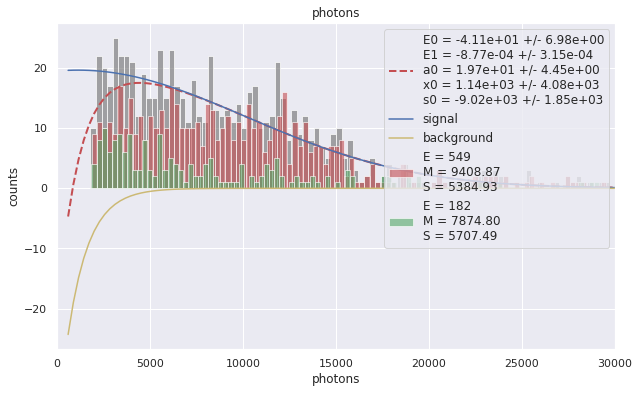

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
hmax = 30000.
myExpG(df['photons'], ax, xmin=600., xmax=hmax, bins=bins, E0=200., E1=-0.001, a0=900., x0=3000., s0=300.)
ax.hist(df['photons'], bins=bins, range=(0,hmax), color='gray', alpha=0.7)
#ax.hist(df.photons[(abs(df.pearson)<0.4)], bins, range=(0,hmax), color="red", alpha=0.6, label="pearson<0.4")
#ax.hist(df.photons[(abs(df.pearson)>0.4)], bins, range=(0,hmax), color="green", alpha=0.6, label="pearson>0.4")
pd_his_plot(df.photons[(df.photons<=hmax) & (abs(df.pearson)<pFeMax)], ax=ax, bins=bins, color="r",
            alpha=0.6)
pd_his_plot(df.photons[(df.photons<=hmax) & (abs(df.pearson)>pFeMax)], ax=ax, bins=bins, color="g", 
            alpha=0.6)


ax.set_xlim(0,hmax)
ax.set_xlabel('photons')
ax.set_ylabel('counts')
#ax.set_yscale("log")
plt.legend(loc=1, prop={'size':'medium'})
plt.minorticks_on()
plt.show()

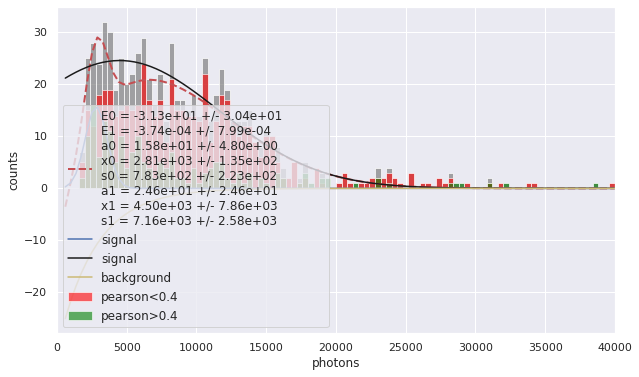

In [48]:
bins = 100

fig, ax = plt.subplots(figsize=(10,6))
hmax = 40000.
myExp2G(df['photons'], ax, xmin=600., xmax=hmax, bins=100, E0=200., E1=-0.001, a0=900., x0=3000., s0=300., a1=90., x1=9000., s1=300.)
ax.hist(df['photons'], bins=100, range=(0,hmax), color='gray', alpha=0.7)
ax.hist(df.photons[(abs(df.pearson)<0.4)], 100, range=(0,hmax), color="red", alpha=0.6, label="pearson<0.4")
ax.hist(df.photons[(abs(df.pearson)>0.4)], 100, range=(0,hmax), color="green", alpha=0.6, label="pearson>0.4")
ax.set_xlim(0,hmax)
ax.set_xlabel('photons')
ax.set_ylabel('counts')
#ax.set_yscale("log")
plt.legend(loc=0, prop={'size':'medium'})
plt.minorticks_on()
plt.show()

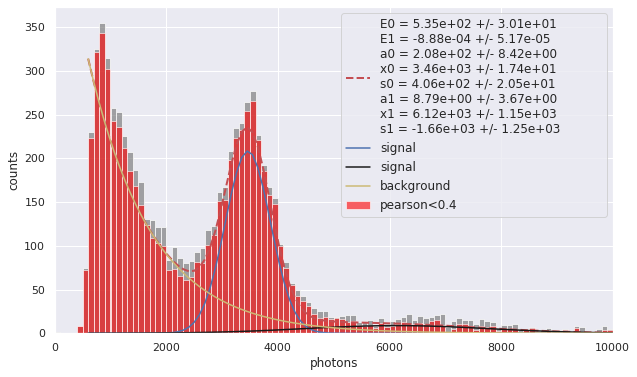

In [13]:
bins = 100

fig, ax = plt.subplots(figsize=(10,6))
#hmax = 15000.
myExp2G(df.photons[(abs(df.pearson)<0.4)], ax, xmin=600., xmax=hmax, bins=100, E0=200., E1=-0.001, a0=900., x0=3000., s0=300., a1=90., x1=9000., s1=300.)
ax.hist(df['photons'], bins=100, range=(0,hmax), color='gray', alpha=0.7)
ax.hist(df.photons[(abs(df.pearson)<0.4)], 100, range=(0,hmax), color="red", alpha=0.6, label="pearson<0.4")
#ax.hist(df.photons[(abs(df.pearson)>0.4)], 100, range=(0,hmax), color="green", alpha=0.6, label="pearson>0.4")
ax.set_xlim(0,hmax)
ax.set_xlabel('photons')
ax.set_ylabel('counts')
#ax.set_yscale("log")
plt.legend(loc=0, prop={'size':'medium'})
plt.minorticks_on()
plt.show()

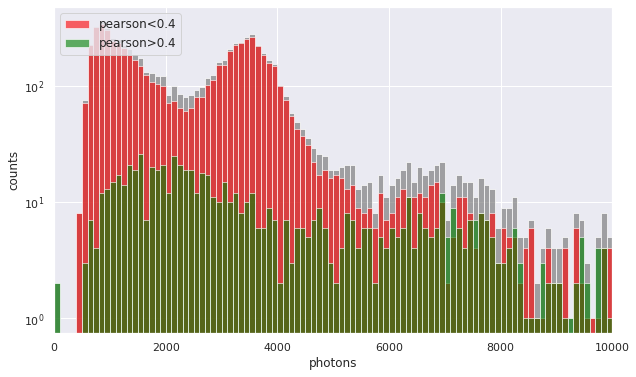

In [14]:
bins = 100

fig, ax = plt.subplots(figsize=(10,6))
#hmax = 50000.
#myExpG(dfc['photons'], ax, xmin=600., xmax=hmax, bins=100, E0=200., E1=-0.001, a0=900., x0=3000., s0=300.)
ax.hist(df['photons'], bins=100, range=(0,hmax), color='gray', alpha=0.7)
ax.hist(df.photons[(abs(df.pearson)<0.4)], 100, range=(0,hmax), color="red", alpha=0.6, label="pearson<0.4")
ax.hist(df.photons[(abs(df.pearson)>0.4)], 100, range=(0,hmax), color="green", alpha=0.6, label="pearson>0.4")
ax.set_xlim(0,hmax)
ax.set_xlabel('photons')
ax.set_ylabel('counts')
ax.set_yscale("log")
plt.legend(loc=2, prop={'size':'medium'})
plt.minorticks_on()
plt.show()

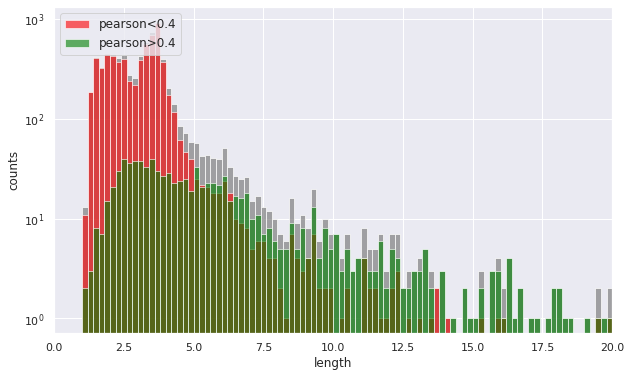

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
hmax=20
ax.hist(df.length, bins=100, range=(0,hmax), color='gray', alpha=0.7)
ax.hist(df.length[(abs(df.pearson)<0.4)], 100, range=(0,hmax), color="red", alpha=0.6, label="pearson<0.4")
ax.hist(df.length[(abs(df.pearson)>0.4)], 100, range=(0,hmax), color="green", alpha=0.6, label="pearson>0.4")
ax.set_xlim(0,hmax)
ax.set_xlabel('length')
ax.set_ylabel('counts')
ax.set_yscale("log")
plt.legend(loc=2, prop={'size':'medium'})
plt.minorticks_on()
plt.show()

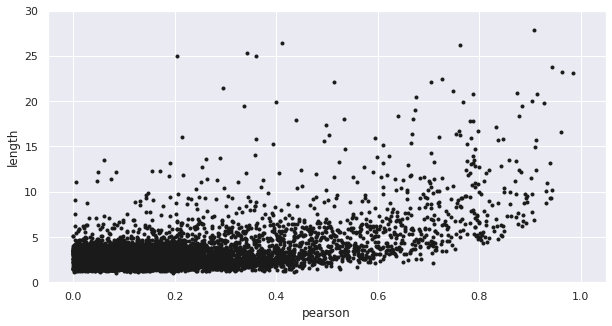

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(abs(df.pearson.values), df.length.values, 'k.')
ax.set_ylabel('length')
ax.set_xlabel('pearson')

ax.set_ylim(0,30)
plt.show()

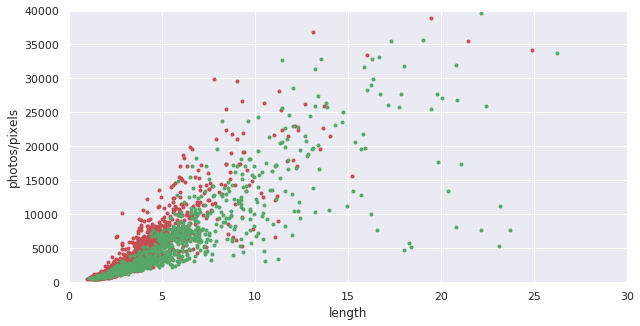

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
#ax.plot(df.length.values, df.ph_pixels.values, 'k.')
ax.plot(df.length.values[abs(df.pearson.values)<0.4], df.photons.values[abs(df.pearson.values)<0.4], 'r.')
ax.plot(df.length.values[abs(df.pearson.values)>0.4], df.photons.values[abs(df.pearson.values)>0.4], 'g.')
ax.set_ylabel('photos/pixels')
ax.set_xlabel('length')
ax.set_xlim(0,30)
ax.set_ylim(0,40000)
plt.show()

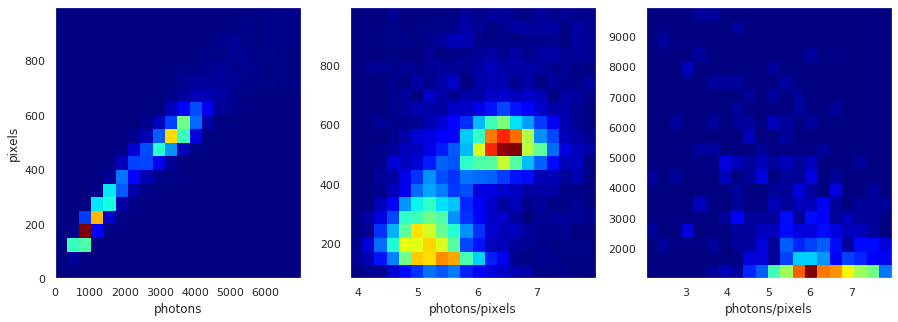

In [18]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
hmax  = 6000.
mpixe = 1000
mph   = 7000
mpphp_p = 8
ax[0].hist2d(df.photons.values[((df.pixels<mpixe)&(df.photons<mph))], 
           df.pixels.values[((df.pixels<mpixe)&(df.photons<mph))], 
           bins=(20,20), cmap=plt.cm.jet)
ax[0].set_xlabel("photons")
ax[0].set_ylabel("pixels")
ax[1].hist2d(df.ph_pixels.values[((df.pixels<mpixe)&(df.ph_pixels<mpphp_p))], 
           df.pixels.values[((df.pixels<mpixe)&(df.ph_pixels<mpphp_p))], 
           bins=(20,20), cmap=plt.cm.jet)
ax[1].set_xlabel("photons/pixels")

ax[2].hist2d(df.ph_pixels.values[(df.pixels>1000)&(df.pixels<10000)&(df.ph_pixels<mpphp_p)], 
           df.pixels.values[(df.pixels>1000)&(df.pixels<10000)&(df.ph_pixels<mpphp_p)], 
           bins=(20,20), cmap=plt.cm.jet)
ax[2].set_xlabel("photons/pixels")

plt.show()

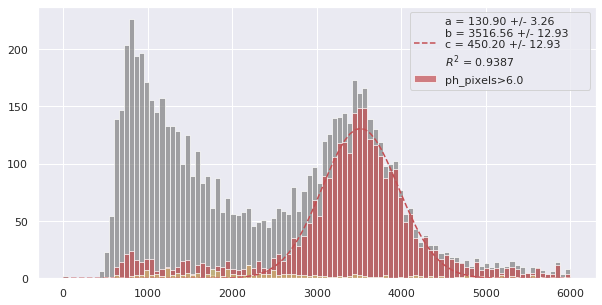

In [19]:
from sklearn.metrics import r2_score
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df['photons'], bins=bins, range=(0,hmax), color='gray', alpha=0.7)
#ax.hist(df['photons'][(df.ph_pixels>6.0)], bins=bins, range=(0,hmax), color='red', alpha=0.7)
histGaus(df['photons'][(df.ph_pixels>6.0)], bins, ax, color='r', xrange=(0,hmax), alpha=0.7, label='ph_pixels>6.0')

ax.hist(df['photons'][(df.ph_pixels<6.0) & ((abs(df.pearson>0.4)))], bins=bins, range=(0,hmax), color='y', alpha=0.7)

# var = df['photons'][(df.ph_pixels>6.0)]
# y, bins_edge = np.histogram(var, bins=bins, range=(0,hmax))
# x = np.linspace(bins_edge[0], bins_edge[-1], bins)
# popt, pcov = curve_fit(Gauss3, x, y, p0=[var.max(), var.mean(), var.std()])
# perr = np.sqrt(np.diag(pcov))
# r2=r2_score(y, Gauss3(x, *popt))
# x = np.linspace(bins_edge[0], bins_edge[-1], 100)
# sstat='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
# \nc = {4:.2f} +/- {5:.2f}\n$R^2$ = {6:.4f}'.format(popt[0], perr[0], popt[1], perr[1], 
#                                             popt[2], perr[2], r2)
# ax.plot(x,Gauss3(x, *popt), 'b--', label=sstat)
plt.legend()
plt.show()

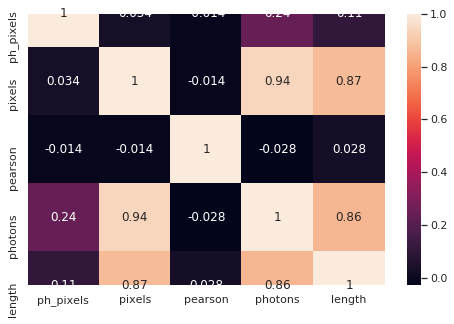

,ph_pixels,pixels,pearson,photons,length
ph_pixels,1.000000,0.033661,-0.014461,0.241258,0.107703
pixels,0.033661,1.000000,-0.013601,0.941313,0.869630
pearson,-0.014461,-0.013601,1.000000,-0.028053,0.028183
photons,0.241258,0.941313,-0.028053,1.000000,0.856125
length,0.107703,0.869630,0.028183,0.856125,1.000000


In [20]:
import seaborn as sns
# pixels	photons	ph_pixels	x0start	y0start	x0end	y0end	length	mse	r2
features = df[['ph_pixels','pixels','pearson', 'photons', 'length']][df['ph_pixels']>0].copy()
plt.figure(figsize = (8,5))
sns.heatmap(features.corr(), annot=True)
plt.show()

features.corr()

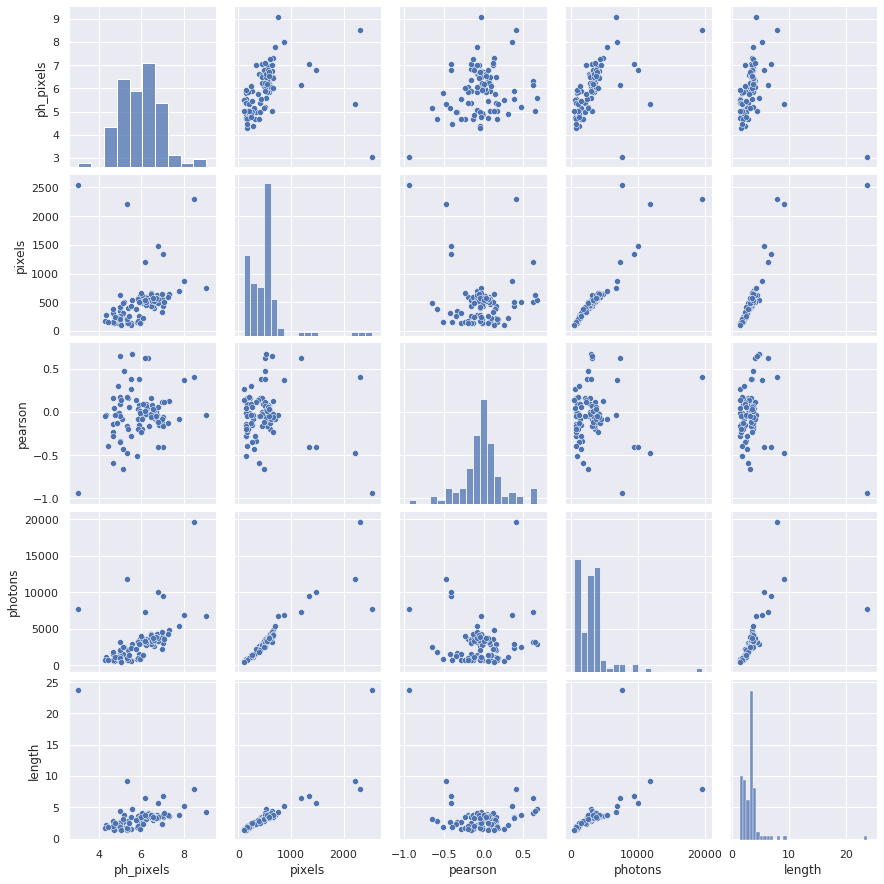

In [21]:
sns.pairplot(features.sample(100))
plt.show()

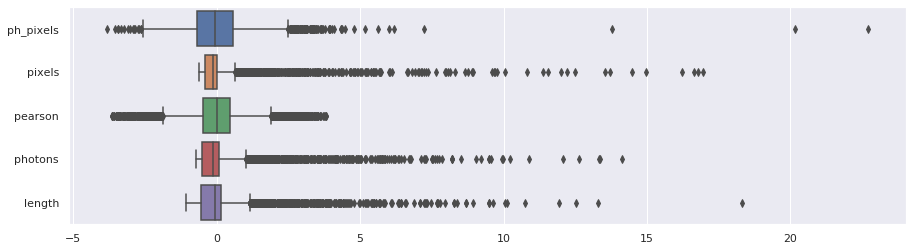

,ph_pixels,pixels,pearson,photons,length
count,7.627000e+03,7.627000e+03,7.627000e+03,7.627000e+03,7.627000e+03
mean,6.838054e-16,-3.214072e-17,-1.723488e-17,9.875119e-17,-1.006144e-16
std,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00,1.000066e+00
min,-3.836500e+00,-6.027280e-01,-3.642003e+00,-7.267949e-01,-1.069995e+00
25%,-6.910033e-01,-4.053637e-01,-4.643728e-01,-5.284139e-01,-5.302573e-01
50%,-6.447939e-02,-1.226870e-01,1.127257e-02,-1.424967e-01,-6.278293e-02
75%,5.790885e-01,1.865135e-02,4.813122e-01,9.381087e-02,1.415426e-01
max,2.269097e+01,1.695379e+01,3.810620e+00,1.414598e+01,1.832054e+01


In [22]:
# normalizzazione delle variabili

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(features)
# pixels	photons	ph_pixels	x0start	y0start	x0end	y0end	length	mse	r2
scaled_dataframe = pd.DataFrame( scaled_array, columns = features.columns ) # df.colums per tutte e colonne
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()
scaled_dataframe.describe()

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_dataframe)
#pred_y = kmeans.fit_predict(features)
features['cluster'] = kmeans.labels_

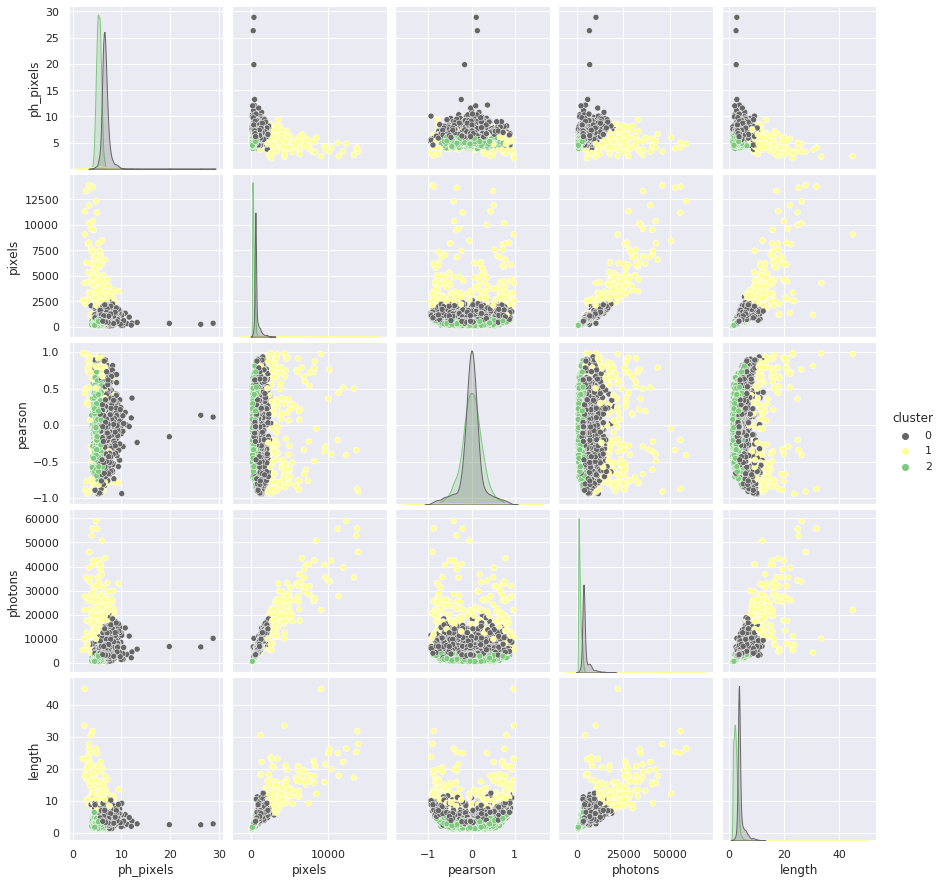

In [24]:
#customPalette = sns.set_palette(sns.color_palette(['#0000FF', '#FF0000', '#00FF00']))
sns.pairplot(data = features, hue = "cluster", palette = "Accent_r")
plt.show()

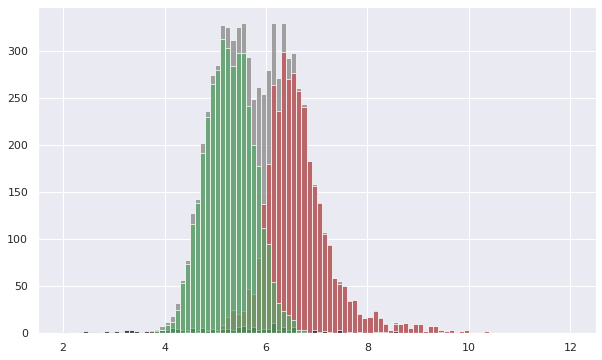

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.ph_pixels, bins=100, color='gray', alpha=0.7, range=(2, 12))
plt.hist(features.ph_pixels[features.cluster==0], bins=100, color='r', alpha=0.7, range=(2, 12))
plt.hist(features.ph_pixels[features.cluster==1], bins=100, color='k', alpha=0.7, range=(2, 12))
plt.hist(features.ph_pixels[features.cluster==2], bins=100, color='g', alpha=0.7, range=(2, 12))

plt.show()

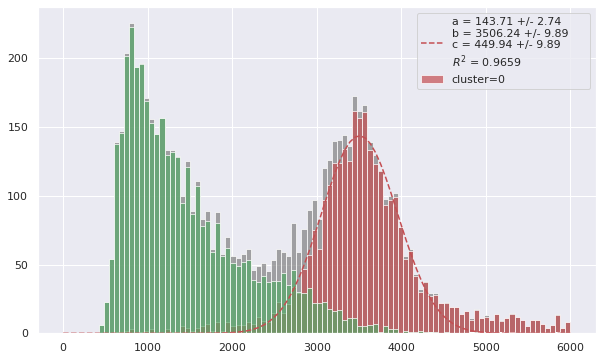

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.photons, bins=100, color='gray', alpha=0.7, range=(0, 6000))
#plt.hist(features.photons[features.cluster==0], bins=100, color='r', alpha=0.7, range=(0, 6000))
histGaus(features.photons[features.cluster==0], 100, ax, color='r', xrange=(0,6000), alpha=0.7, label='cluster=0')
plt.hist(features.photons[features.cluster==1], bins=100, color='k', alpha=1, range=(0, 6000))
plt.hist(features.photons[features.cluster==2], bins=100, color='g', alpha=0.7, range=(0, 6000))
plt.legend()
plt.show()

# analisi multifile

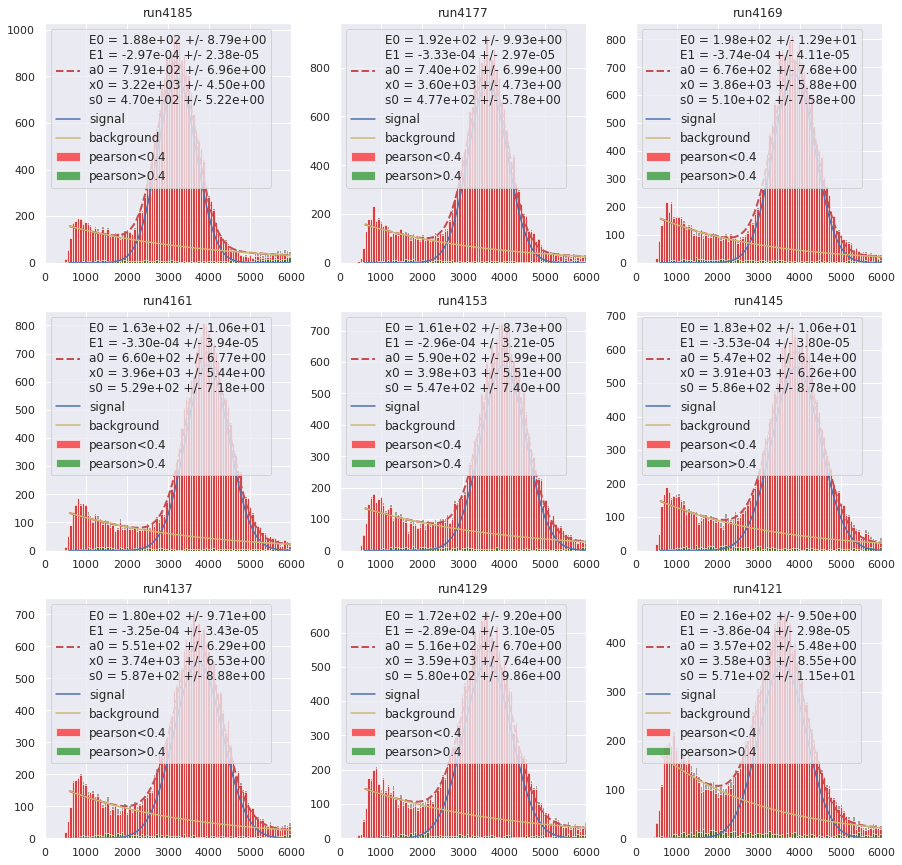

In [27]:
# Bandella
# file_out=["dbscan_run4184_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
#          "dbscan_run4176_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
#          "dbscan_run4168_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
#          "dbscan_run4160_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
#          "dbscan_run4152_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
#          "dbscan_run4144_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
#          "dbscan_run4136_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_197_ped_4183_vF0.plk.gz",
#          "dbscan_run4128_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
#          "dbscan_run4120_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz"]

# d = {'run': [4184, 4176, 4160, 4168, 4152, 4144, 4136, 4128, 4120], 'd': [6.5, 11, 16, 21, 26, 31, 36, 41, 46]}


file_out=["dbscan_run4185_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4177_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4169_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4161_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4153_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4145_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4137_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4129_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz",
         "dbscan_run4121_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4183_vF0.plk.gz"]

d = {'run': [4185, 4177, 4169, 4161, 4153, 4145, 4137, 4129, 4121], 'd': [6.5, 11, 16, 21, 26, 31, 36, 41, 46]}


info = pd.DataFrame(data=d)

m = []
s = []
pixelscale  = 0.150 
x_resolution = y_resolution = 2304
d0 = x_resolution*pixelscale/2

# agistare il numero di file alla dimesione dei run analizzati
fig, ax = plt.subplots(3,3, figsize=(15,15))
xi = 0
yi = 0

for i, file in enumerate(file_out):
    df = pd.read_pickle(mybasepath+"out/"+file, compression='gzip')

    df['length'] = np.sqrt((df['x0end'] - df['x0start'])**2 + (df['y0end'] - df['y0start'])**2)
    df['x0c'] = (df['x0end'] + df['x0start'])/2.
    df['y0c'] = (df['y0end'] + df['y0start'])/2.
    df = df[(df['cluster_lable'] > -1) & (df['width'] > 0) & (df['height'] > 0)]
    df['length']   =df['length']*pixelscale
    df['x0c']      =df['x0c']*pixelscale
    df['y0c']      =df['y0c']*pixelscale
    # print ("Fidical Circle: %.2f, %.2f [mm]" % (a,b))
    a0 = 150*.5
    df = df[((df['x0c']-d0)**2/a0**2 + (df['y0c']-d0)**2/a0**2 )< 1]
    bins = 100

    #fig, ax = plt.subplots(figsize=(10,6))
    ax[xi,yi].set_title('run'+str(info.iloc[i,0]))
#     if i < 2:
#         hmax = 6000.
#         E0=200.
#         E1=-0.001 
#         a0=100. 
#         x0=3500.
#         s0=300.
#     elif 2 < i < 5
#     else:
#         hmax = 6000.
#         E0=200.
#         E1=-0.001
#         a0=200.
#         x0=3000.
#         s0=300.

    hmax = 6000.
    E0=200.
    E1=-0.001
    a0=200.
    x0=4000.
    s0=300.

        
    _, popt= myExpG(df['photons'], ax[xi,yi], xmin=600., xmax=hmax, bins=100, E0=E0, E1=E1, a0=a0, x0=x0, s0=s0)
    m.append(popt[3])
    s.append(popt[4])
    ax[xi,yi].hist(df['photons'], bins=100, range=(0,hmax), color='gray', alpha=0.7)
    ax[xi,yi].hist(df.photons[(abs(df.pearson)<0.4)], 100, range=(0,hmax), color="red", alpha=0.6, label="pearson<0.4")
    ax[xi,yi].hist(df.photons[(abs(df.pearson)>0.4)], 100, range=(0,hmax), color="green", alpha=0.6, label="pearson>0.4")
    ax[xi,yi].set_xlim(0,hmax)
    #ax.set_yscale("log")
    ax[xi,yi].legend(loc=2, prop={'size':'medium'})
    #plt.minorticks_on()
    yi+=1
    if yi == 3:
        xi+=1
        yi = 0
plt.show()
info['m'] = m
info['s']= s
ban = info

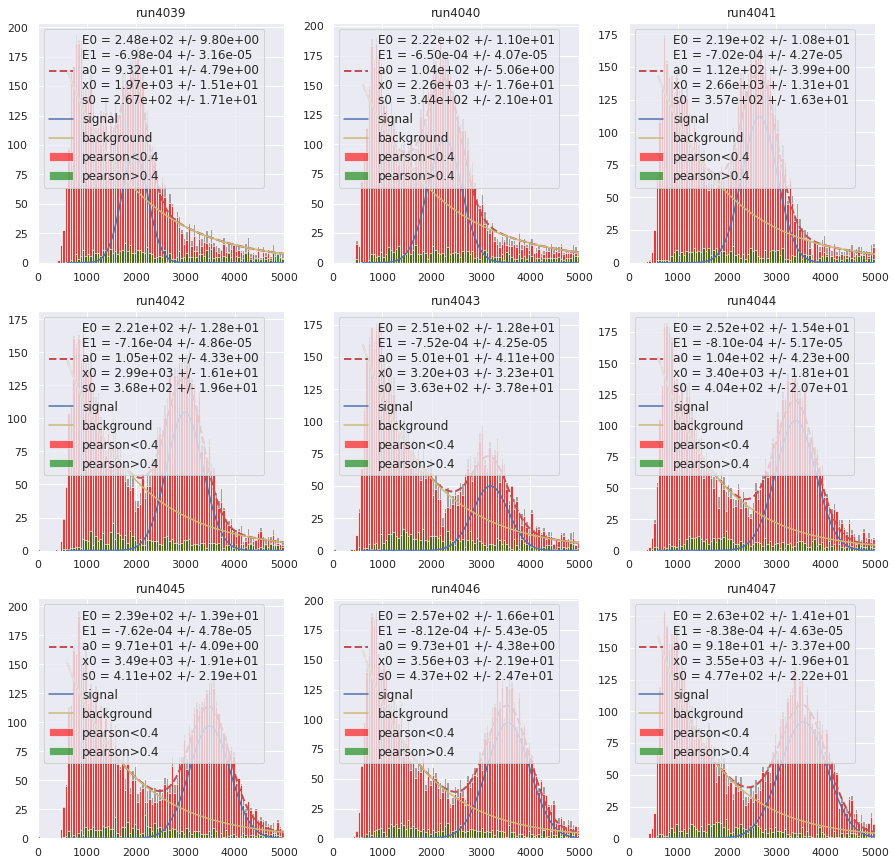

In [28]:
# kfc
file_out=["dbscan_run4039_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4040_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4041_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4042_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4043_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4044_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4045_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4046_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz",
         "dbscan_run4047_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz"]
d = {'run': [4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047], 'd': [6.5, 11, 16, 21, 26, 31, 36, 41, 46]}

info = pd.DataFrame(data=d)

m = []
s = []
pixelscale  = 0.150 
x_resolution = y_resolution = 2304
d0 = x_resolution*pixelscale/2

# agistare il numero di file alla dimesione dei run analizzati
fig, ax = plt.subplots(3,3, figsize=(15,15))
xi = 0
yi = 0

for i, file in enumerate(file_out):
    df = pd.read_pickle(mybasepath+"out/"+file, compression='gzip')

    df['length'] = np.sqrt((df['x0end'] - df['x0start'])**2 + (df['y0end'] - df['y0start'])**2)
    df['x0c'] = (df['x0end'] + df['x0start'])/2.
    df['y0c'] = (df['y0end'] + df['y0start'])/2.
    df = df[(df['cluster_lable'] > -1) & (df['width'] > 0) & (df['height'] > 0)]
    df['length']   =df['length']*pixelscale
    df['x0c']      =df['x0c']*pixelscale
    df['y0c']      =df['y0c']*pixelscale
    # print ("Fidical Circle: %.2f, %.2f [mm]" % (a,b))
    a0 = 150*.5
    df = df[((df['x0c']-d0)**2/a0**2 + (df['y0c']-d0)**2/a0**2 )< 1]
    bins = 100

    #fig, ax = plt.subplots(figsize=(10,6))
    ax[xi,yi].set_title('run'+str(info.iloc[i,0]))
    if i < 2:
        hmax = 3000.
        E0=200.
        E1=-0.001 
        a0=100. 
        x0=2000.
        s0=300.
    else:
        hmax = 4000.
        E0=200.
        E1=-0.001
        a0=200.
        x0=3000.
        s0=300.
    hmax = 5000.
        
    _, popt= myExpG(df['photons'], ax[xi,yi], xmin=600., xmax=hmax, bins=100, E0=E0, E1=E1, a0=a0, x0=x0, s0=s0)
    m.append(popt[3])
    s.append(popt[4])
    ax[xi,yi].hist(df['photons'], bins=100, range=(0,hmax), color='gray', alpha=0.7)
    ax[xi,yi].hist(df.photons[(abs(df.pearson)<0.4)], 100, range=(0,hmax), color="red", alpha=0.6, label="pearson<0.4")
    ax[xi,yi].hist(df.photons[(abs(df.pearson)>0.4)], 100, range=(0,hmax), color="green", alpha=0.6, label="pearson>0.4")
    ax[xi,yi].set_xlim(0,hmax)
    #ax.set_yscale("log")
    ax[xi,yi].legend(loc=2, prop={'size':'medium'})
    #plt.minorticks_on()
    yi+=1
    if yi == 3:
        xi+=1
        yi = 0
plt.show()
info['m'] = m
info['s']= s
kfc = info

In [29]:
def par_fits(info,  col='r-'):
    fig, ax = plt.subplots(1,3, figsize=(20,4))
    ax[0].set_ylabel("photons")
    ax[0].set_xlabel("ditance [cm]")
    ax[0].plot(info.d.values, info.m.values, col)
    ax[1].set_ylabel("sigma")
    ax[1].set_xlabel("ditance [cm]")
    ax[1].plot(info.d.values, info.s.values, col)
    ax[2].set_ylabel("resolution")
    ax[2].set_xlabel("ditance [cm]")
    ax[0].set_ylim(1000,5000)
    ax[1].set_ylim(200,800)
    ax[2].set_ylim(0.10,0.20)

    ax[2].plot(info.d.values, info.s.values/info.m.values, col)
    #ax[0].set_ylim(2000,4000)
    #ax[1].set_ylim(300,700)
    plt.show()

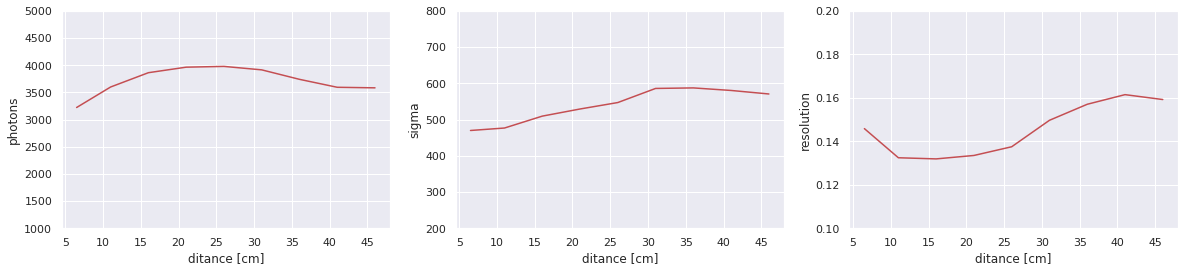

In [30]:
par_fits(ban)

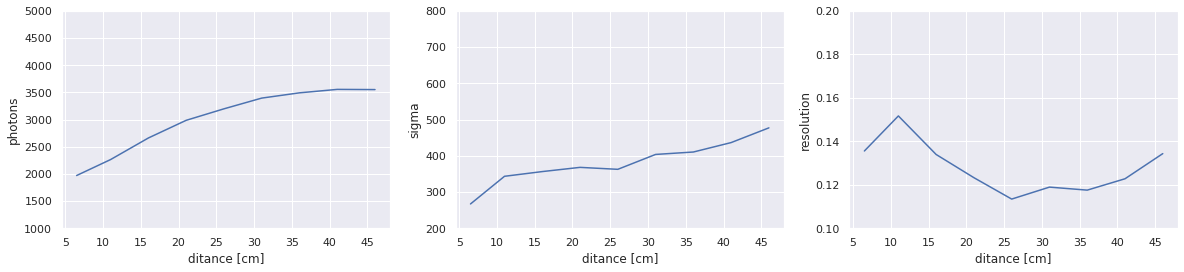

In [31]:
par_fits(kfc, col='b-')

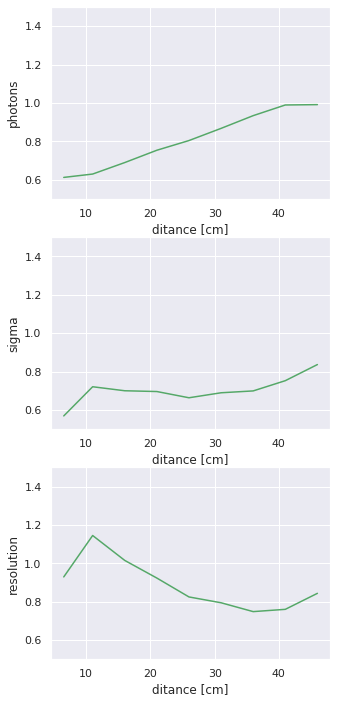

In [32]:
fig, ax = plt.subplots(3,1, figsize=(5,12))
ax[0].set_ylabel("photons")
ax[0].set_xlabel("ditance [cm]")
ax[0].plot(info.d.values, kfc.m.values/ban.m.values, 'g-')
ax[1].set_ylabel("sigma")
ax[1].set_xlabel("ditance [cm]")
ax[1].plot(info.d.values, kfc.s.values/ban.s.values, 'g-')
ax[2].set_ylabel("resolution")
ax[2].set_xlabel("ditance [cm]")
ax[0].set_ylim(0.5,1.5)
ax[1].set_ylim(0.5,1.5)
ax[2].set_ylim(0.5,1.5)

ax[2].plot(info.d.values, (kfc.s.values/kfc.m.values)/(ban.s.values/ban.m.values), 'g-')
#ax[0].set_ylim(2000,4000)
#ax[1].set_ylim(300,700)
plt.show()

In [33]:
!ls

AnalisiCluster.ipynb		 FeDbscan.ipynb		display.ipynb
AnalisiCosmics.ipynb		 HIS2ROOT		myenv.sh
CosmicsFittingMaker-Copy1.ipynb  InitAndFuctions.ipynb	mylib.py
CosmicsFittingMaker.ipynb	 PY			pippo.root
CosmicsLine.ipynb		 README.md		plot_robust_fit.ipynb
CosmicsPoly3.ipynb		 __pycache__		test
EvalueteRate.ipynb		 cygnus_lib.py
FeClusteringMaker.ipynb		 debugImage.ipynb


In [34]:
! echo $file_out

[dbscan_run4039_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4040_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4041_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4042_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4043_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4044_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4045_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4046_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz, dbscan_run4047_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038_vF0.plk.gz]


In [35]:
file_out=["dbscan_run4184_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz",
         "dbscan_run4176_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz",
         "dbscan_run4168_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz",
         "dbscan_run4160_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz",
         "dbscan_run4152_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz",
         "dbscan_run4144_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz",
         "dbscan_run4136_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_197_ped_4183.plk.gz",
         "dbscan_run4128_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz",
         "dbscan_run4120_cmin_0_cmax_500_rescale_576_nsigma_1.5_ev_200_ped_4183.plk.gz"]
file_out=["dbscan_run4039_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4040_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4041_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4042_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4043_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4044_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4045_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4046_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz",
        "dbscan_run4047_cmin_0_cmax_500_rescale_2304_nsigma_1.5_ev_200_ped_4038.plk.gz"]


In [36]:
# for i, file in enumerate(file_out):
#     da = mybasepath+"out/"+file
#     a = mybasepath+"bck/"+file
#     print("cp "+da+" a "+a)
#     ! cp $da $a 

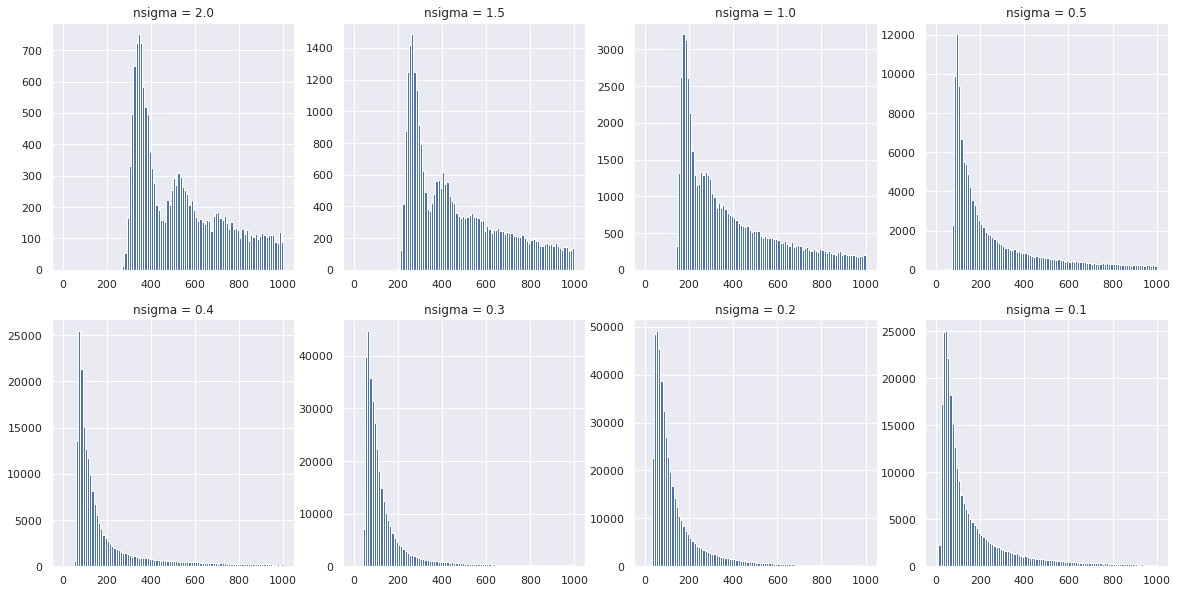

In [37]:
file_out=["dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_2.0_ev_100_ped_4034_vR0.plk.gz",
          "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_1.5_ev_100_ped_4034_vR0.plk.gz",
          "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_1.0_ev_100_ped_4034_vR0.plk.gz",
          "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_0.5_ev_100_ped_4034_vR0.plk.gz",
          "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_0.4_ev_100_ped_4034_vR0.plk.gz",
          "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_0.3_ev_100_ped_4034_vR0.plk.gz",
          "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_0.2_ev_100_ped_4034_vR0.plk.gz",
          "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_0.1_ev_100_ped_4034_vR0.plk.gz"]

data = pd.DataFrame(columns=['nsigma', 'ncluster', 'ph'])

fig, ax = plt.subplots(2,4, figsize=(20,10))
xi = 0
yi = 0

for i, file in enumerate(file_out):
    fileInfo = FileNameInfo(file)
    df = pd.read_pickle(mybasepath+"out/"+file, compression='gzip')
    dataRun = run_info_logbook(int(fileInfo.dbscan[0].split('run')[-1]), verbose=False)
    rate = 0
    ph = 0
    for j in range(int(max(df.iTr))):
        rate += df[df.iTr==j].cluster_lable.max()
        ph += df[df.iTr==j].photons.sum()
    rate=rate/int(max(df.iTr))*1/float(dataRun['Exposure_Time_ms'])*1e3
    ph = ph/int(max(df.iTr))*1/float(dataRun['Exposure_Time_ms'])*1e3
        
    data = data.append({'nsigma':fileInfo.nsigma.values[0], 'ncluster':rate, 'ph':ph}, ignore_index=True)
    ax[xi,yi].set_title('nsigma = '+fileInfo.nsigma.values[0])
    ax[xi,yi].hist(df.photons, range=(0,1000),bins=100)
    yi+=1
    if yi == 4:
        xi+=1
        yi = 0
plt.show()

In [38]:
data

,nsigma,ncluster,ph
0,2.0,569.272727,1.204557e+06
1,1.5,920.666667,1.766270e+06
2,1.0,1580.464646,2.696814e+06
3,0.5,2991.494949,4.432195e+06
4,0.4,4408.484848,5.067710e+06
5,0.3,7487.252525,6.002530e+06
6,0.2,9903.919192,7.260395e+06
7,0.1,5648.141414,8.677568e+06


/usr/local/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


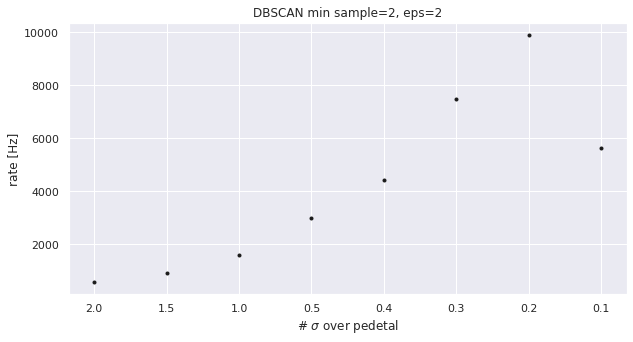

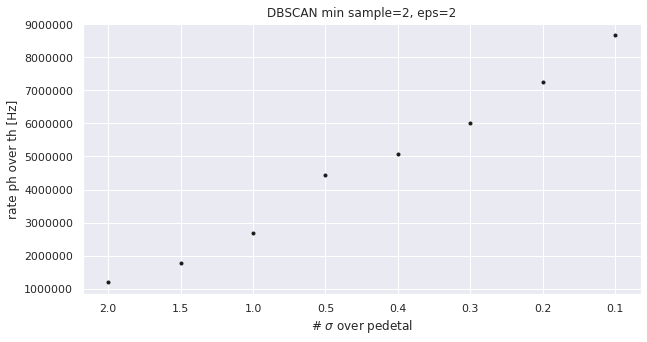

In [39]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(data.nsigma, data.ncluster, 'k.')
ax.set_ylabel('rate [Hz]')
ax.set_xlabel("# $\sigma$ over pedetal")
ax.set_title('DBSCAN min sample=2, eps=2')
plt.show()
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(data.nsigma, data.ph, 'k.')
ax.set_ylabel('rate ph over th [Hz]')
ax.set_xlabel("# $\sigma$ over pedetal")
ax.set_title('DBSCAN min sample=2, eps=2')
plt.show()

In [40]:
file = "dbscan_run4035_cmin_0_cmax_1000_rescale_576_nsigma_2.0_ev_100_ped_4034_vR0.plk.gz"
fileInfo = FileNameInfo(file)
df = pd.read_pickle(mybasepath+"out/"+file, compression='gzip')
dataRun = run_info_logbook(int(fileInfo.dbscan[0].split('run')[-1]), verbose=False)

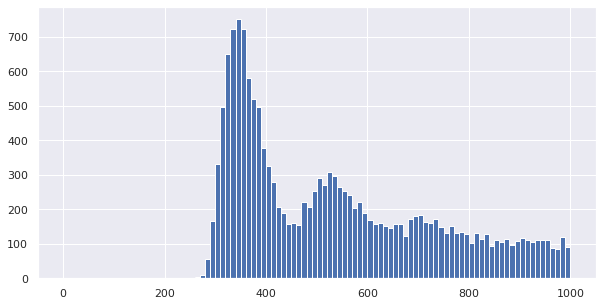

In [41]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.hist(df.photons, range=(0,1000),bins=100)
#ax.set_yscale('log')
plt.show()